In [1]:
import tensorflow
print(tensorflow.__version__)

2.16.1


 Data Pre-Processing

In [2]:
import cv2, os
data_path = 'E:\Classification of Osteoporosis\Dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

#empty dictionary
label_dict = dict(zip(categories, labels))
print(categories)
print(labels)
print(label_dict)

['preprocessed_0Normal', 'preprocessed_1Doubtful', 'preprocessed_2Mild', 'preprocessed_3Moderate', 'preprocessed_4Severe']
[0, 1, 2, 3, 4]
{'preprocessed_0Normal': 0, 'preprocessed_1Doubtful': 1, 'preprocessed_2Mild': 2, 'preprocessed_3Moderate': 3, 'preprocessed_4Severe': 4}


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\tharu\AppData\Local\Temp\ipykernel_10888\2391053804.py:2: SyntaxWarning: invalid escape sequence '\C'
  data_path = 'E:\Classification of Osteoporosis\Dataset'


In [3]:
img_size = 256
data = []
label = []

for category in categories:
    #loading folder path
    folder_path = os.path.join(data_path,category)
    #loading the image files as list
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        #loading every image path of current folder
        img_path = os.path.join(folder_path,img_name)
        #read the image as numpy array
        img = cv2.imread(img_path)
        
        try:
            #convert the BGR image to Gray scale
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #resize the image into 256x256
            resized = cv2.resize(gray, (img_size, img_size))
            
            #add the resized image into the data list
            data.append(resized)
            #add the category of current image to label list
            label.append(label_dict[category])
            
        except Exception as e:
            #it handles if any exception is occurred
            print('Exception : ',e)
        

Rescale and Assign Categorical Label

In [4]:
import numpy as np
#convert the image to numpy array and normalize the values between 0 and 1
data = np.array(data)/255.0
#reshape the data into a new shape
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))

#convert the label list to numpy array
label = np.array(label)

from keras.utils import to_categorical
#NumPy array where each row represents a one-hot encoded vector
new_label = to_categorical(label)

In [5]:
print(new_label.shape)
print(data.shape)
print(data.shape[1:])

(3671, 5)
(3671, 256, 256, 1)
(256, 256, 1)


CNN Model

In [6]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

# Create a input layer
input_layer = Input(shape = data.shape[1:])


# Initialize the sequential model to arrange the layers in a sequential manner
model = Sequential()

# Add input layer
model.add(input_layer)

# Conv2D is a CNN layer to extract features -> edges, textures and patterns
# Relu is a activation layer that adds non linearity to the network
# MaxPoolind layer will reduce the spatial resolution and controls the overfitting

model = Sequential()
# First CNN layer followed by Relu and MaxPooling Layers

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third CNN layer followed by Relu and Maxpooling layer

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten layer(input data to one dimensional array) to stack the output convolutions from 3rd layer
model.add(Flatten())
# Drops 20% of input units in each training of data to reduce overfitting
model.add(Dropout(0.2))

# Dense Layer(Fully connected layer) of 128 neurons
model.add(Dense(128, activation = 'relu'))


model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))

# Fully connected layer with 5 output labels
model.add(Dense(5, activation = 'softmax'))

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
# Textual summary of neural model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Splitting Data into Training and Testing

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, new_label, test_size = 0.1)

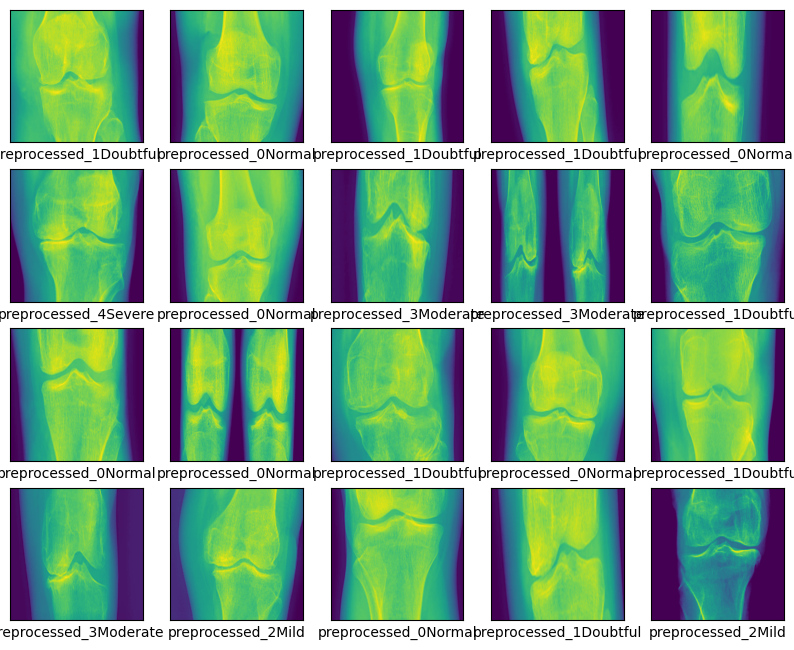

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

Training the Model

In [10]:
history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.3209 - loss: 1.5724 - val_accuracy: 0.3661 - val_loss: 1.4230
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.3832 - loss: 1.4343 - val_accuracy: 0.3797 - val_loss: 1.3710
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.3978 - loss: 1.3524 - val_accuracy: 0.4024 - val_loss: 1.3465
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.4086 - loss: 1.3314 - val_accuracy: 0.4191 - val_loss: 1.3058
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.4431 - loss: 1.2931 - val_accuracy: 0.4402 - val_loss: 1.3627
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.4728 - loss: 1.2683 - val_accuracy: 0.4811 - val_loss: 1.2172
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.4846 - loss: 1.2251 - val_accuracy: 0.4932 - val_loss: 1.1815
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.5291 - loss: 1.1544 - val_accuracy: 0.

In [11]:
# Save the model for next predictions
model.save('model.h5')

Plot the Training Loss and Accuracy

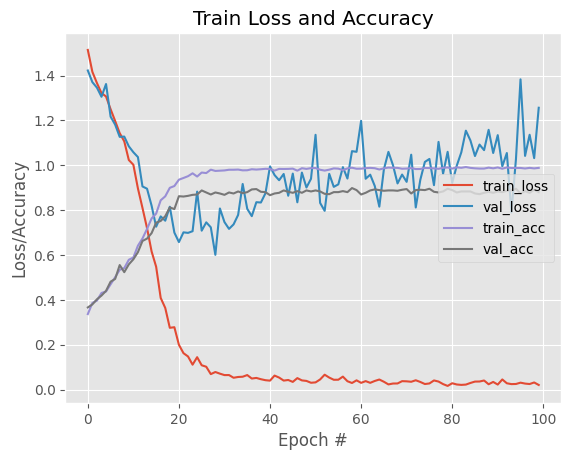

In [16]:
from matplotlib import pyplot as plt
import numpy as np
# No of epochs
N = 100 

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label = "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_acc")
plt.title("Train Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "center right")
plt.savefig("CNN_Model")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


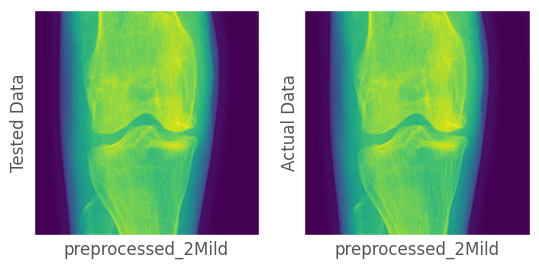

Predicted Label :  preprocessed_2Mild
True Label :  preprocessed_2Mild


In [17]:
X = 92

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0], 256, 256, 1)

predictions_single = model.predict(img_single)

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(np.squeeze(img_single))
plt.xlabel(categories[np.argmax(predictions_single)])
plt.ylabel("Tested Data")

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(np.squeeze(x_test[X]))
plt.xlabel(categories[np.argmax(y_test[X])])
plt.ylabel("Actual Data")

plt.show()
print('Predicted Label : ', categories[np.argmax(predictions_single)])
print('True Label : ', categories[np.argmax(y_test[X])])

In [19]:
from PIL import Image

img_path = 'E:\Classification of Osteoporosis\DataSet\preprocessed_2Mild\MildG2 (5).png'
img = Image.open(img_path).convert('L')  # convert to grayscale
img = img.resize((img_size, img_size))
img = np.array(img) / 255.0  # normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
# Prediction 
predictions_test_single = model.predict(img)
predicted_category = categories[np.argmax(predictions_test_single)]
print(predicted_category)

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\tharu\AppData\Local\Temp\ipykernel_10888\2400018908.py:3: SyntaxWarning: invalid escape sequence '\C'
  img_path = 'E:\Classification of Osteoporosis\DataSet\preprocessed_2Mild\MildG2 (5).png'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
preprocessed_2Mild


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 669ms/step


<Figure size 640x480 with 0 Axes>

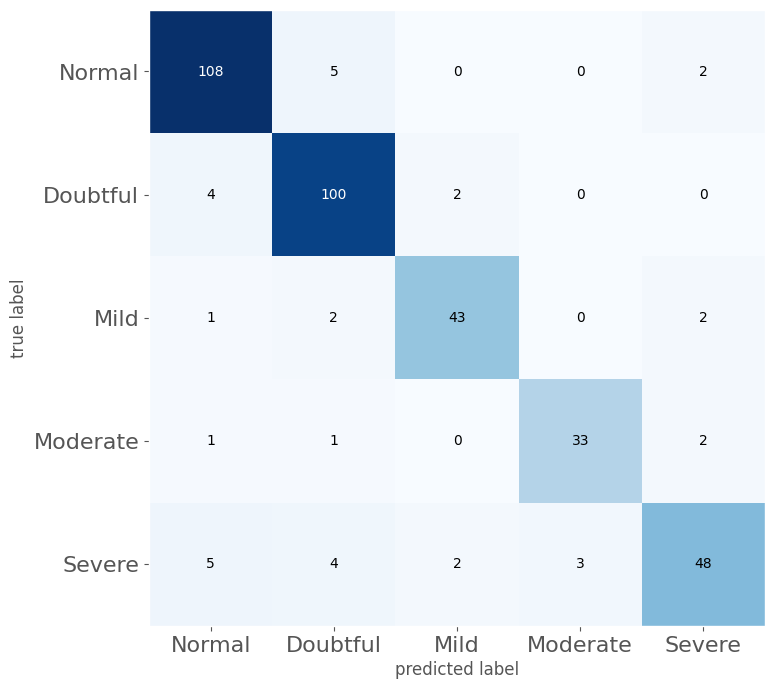

In [22]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis = 1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = -1)

cm = confusion_matrix(test_labels, predictions)

# Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(cm, 
                     figsize = (12,8), 
                     hide_ticks = True, 
                     cmap = plt.cm.Blues)
plt.xticks(range(5), ['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe'], fontsize = 16)
plt.yticks(range(5), ['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe'], fontsize = 16)
plt.show()


In [25]:
# Train test accuracy
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss : ', loss)
print('Test Accuracy : ', accuracy)

Test Loss :  0.9959566593170166
Test Accuracy :  0.9021739363670349
